---
<span style="font-size: 28px;">**Ερώτηση 3**</span>

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Διάβασμα των train και test δεδομένων
with open('graph_train_data.txt', 'r') as f_train, open('graph_test_data.txt', 'r') as f_test:
    train_data = [line.strip().split() for line in f_train.readlines()]
    test_data = [line.strip().split() for line in f_test.readlines()]
      
asins_train = [pair[1] for pair in train_data]
asins_test = [pair[1] for pair in test_data]
all_asins = np.concatenate((asins_train, asins_test)) # όλα τα προϊόντα για σιγουριά

# Δημιουργία του διμερούς γράφηματος από το train
G = nx.read_edgelist('graph_train_data.txt')

# Εκτέλεση Personalized Pagerank για κάθε ζευγάρι στα test δεδομένα
rankings = []
for pair in test_data:
    user, product = pair
    if user in G.nodes and product in G.nodes:
        # Τρέξιμο του Personalized Pagerank αλγορίθμου με το σωστό σημείο επανεκκίνησης "user" σε κάθε iteration,
        # αφού βάζουμε τον συγκεκριμένο "user" με πιθανότητα 1 ενώ όλα τα άλλα nodes έχουν την default πιθανότητα που είναι 0
        personalized_pagerank_scores = nx.pagerank(G, personalization={user:1})
        
        # Αφαίρεση των προϊόντων που έχει ήδη αγοράσει ο χρήστης
        # Η πρακτική σημασία αυτού του βήματος, είναι λόγω του ότι μας ενδιαφέρουν τα προϊόντα που δεν έχει αγοράσει ο "user"
        # Γιατί το test έχει προϊόντα που ακόμα ο "user" δεν έχει αγοράσει και άρα αυτά τα προϊόντα θα θέλουμε να δούμε πόσο πιθανό θα είναι να τα αγοράσει
        purchased_products = set(G.neighbors(user)) # έχει προϊόντα που ήδη έχει αγοράσει
        personalized_pagerank_scores = {productORuser: score for productORuser, score in personalized_pagerank_scores.items() if productORuser not in purchased_products}
        # Το "productORuser" που χρησιμοποιήθηκε παραπάνω στο for, είναι και user μερικές φορές και product
        # Παρακάτω θα πάρουμε ΜΟΝΟ τα products, αφού αυτά χρηαζόμαστε με βάση την εκφώνηση της εργασίας
        personalized_pagerank_scores_ONLY_products = {asin: score  for asin, score in personalized_pagerank_scores.items() if asin in all_asins}
        
        # Ταξινόμηση βάσει της πιθανότητας
        sorted_products = dict(sorted(personalized_pagerank_scores_ONLY_products.items(), key=lambda item: item[1], reverse=True))
      
        # Καταχώρηση της θέσης του ενδιαφερόμενου προϊόντος στο ranking
        rank = list(sorted_products.keys()).index(product) + 1
        rankings.append((user, product, rank))

# Εκτύπωση των αποτελεσμάτων για οπτικοποίηση
for i, rank in enumerate(rankings, start=1):
    print("Το ζευγάρι (", rank[0], rank[1], ") έχει το συγκεκριμένο προϊόν στην θέση: ", rank[2])

Το ζευγάρι ( A10DTOWMTN6VC8 B00K0NRZ5K ) έχει το συγκεκριμένο προϊόν στην θέση:  78
Το ζευγάρι ( A10F15DU5XF86H B00HQS2MCS ) έχει το συγκεκριμένο προϊόν στην θέση:  144
Το ζευγάρι ( A10J1NIBCBVEW1 B00DRNEV9S ) έχει το συγκεκριμένο προϊόν στην θέση:  3
Το ζευγάρι ( A10OJXPDFE0GOK B00PKM1QCO ) έχει το συγκεκριμένο προϊόν στην θέση:  205
Το ζευγάρι ( A1134GV44SWB4N B00DRNEV9S ) έχει το συγκεκριμένο προϊόν στην θέση:  3
Το ζευγάρι ( A11Q7VOCAGFL1W B00F64LD4W ) έχει το συγκεκριμένο προϊόν στην θέση:  15
Το ζευγάρι ( A11YHIDRYHFF4H B002KQLUVU ) έχει το συγκεκριμένο προϊόν στην θέση:  30
Το ζευγάρι ( A12V7BFRODAIC1 B00A29WCA0 ) έχει το συγκεκριμένο προϊόν στην θέση:  2
Το ζευγάρι ( A13CFTDT6RUPZZ B00SUQ27QG ) έχει το συγκεκριμένο προϊόν στην θέση:  3
Το ζευγάρι ( A13DLJ6KTMT4KS B00LLP508U ) έχει το συγκεκριμένο προϊόν στην θέση:  4
Το ζευγάρι ( A13MSOD93RH5BW B004DPZ2T2 ) έχει το συγκεκριμένο προϊόν στην θέση:  15
Το ζευγάρι ( A13R0XXYR3MX51 B008DYS016 ) έχει το συγκεκριμένο προϊόν στην θέση:

In [2]:
# Υπολογισμός Mean Reciprocal Rank (MRR)
mrp = sum([1/rank[2] for rank in rankings]) / len(rankings)
print("MRP: ",mrp)

# Υπολογισμός best Mean Reciprocal Rank (MRR)
print("Best MRP: ", sum([1/1 for rank in rankings]) / len(rankings))

MRP:  0.13500998174338916
Best MRP:  1.0


<span style="font-size: 18px;">**Παρατηρήσεις**</span></br>
Προφανώς η τιμή MRP που βγήκε, δεν είναι πολύ καλή, αφού είναι περίπου 0.135/1 (δηλαδή απέχει αρκετά από την καλύτερη τιμή η οποία είναι το 1).</br>
Βγαίνει νόημα να είναι χαμηλή αυτή η τιμή, αφού ο τύπος παίνρει τον μέσο όρο των **αντιστρόφων** του rank, που αυτό πρακτικά σημαίνει ότι ήδη για παράδειγμα, από το rank=2(δηλαδή 1/2=0.5), έχουμε μειώσει απότομα την τιμή στο μισό του, ήδη κι όλας από το rank=2, που και αυτό το rank κανονικά είναι πολύ καλό απότελεσμα.</br>
Γενικά αυτήν είναι μια ιδιότητα του αντιστρόφου, δηλαδή να υποβαθμίζει με γρήγορο ρυθμό τις τιμές του, όσο αυξάνεται γραμμικά ο παρονομαστής του.</br>
Στην παρακάτω μετρική φαίνεται λίγο καλύτερα η απόδοση του αλγορίθμου, που δεν είναι τόσο τραγική.

Το ποσοστό των πρώτων  1  στο rankings:  6.636155606407322 %
Το ποσοστό των πρώτων  2  στο rankings:  11.212814645308924 %
Το ποσοστό των πρώτων  3  στο rankings:  13.958810068649885 %
Το ποσοστό των πρώτων  4  στο rankings:  15.102974828375288 %
Το ποσοστό των πρώτων  5  στο rankings:  17.620137299771166 %
Το ποσοστό των πρώτων  6  στο rankings:  19.450800915331808 %
Το ποσοστό των πρώτων  7  στο rankings:  21.052631578947366 %
Το ποσοστό των πρώτων  8  στο rankings:  22.19679633867277 %
Το ποσοστό των πρώτων  9  στο rankings:  23.569794050343248 %
Το ποσοστό των πρώτων  10  στο rankings:  25.62929061784897 %
Το ποσοστό των πρώτων  11  στο rankings:  27.002288329519452 %
Το ποσοστό των πρώτων  12  στο rankings:  27.68878718535469 %
Το ποσοστό των πρώτων  13  στο rankings:  29.061784897025174 %
Το ποσοστό των πρώτων  14  στο rankings:  29.97711670480549 %
Το ποσοστό των πρώτων  15  στο rankings:  32.036613272311214 %
Το ποσοστό των πρώτων  16  στο rankings:  33.18077803203661 %
Το ποσο

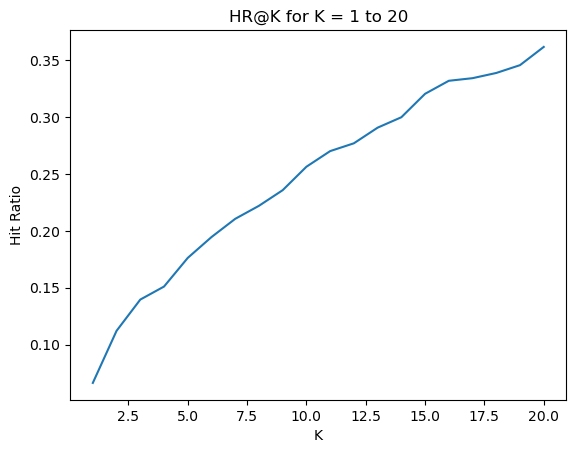

In [3]:
# Υπολογισμός HR@K
K = 21

# Υπολογισμός HR@K για K από 1 έως 20
hr_at_k_values = [sum([1 for rank in rankings if rank[2] <= k]) / len(rankings) for k in range(1, K)]

for i in range(0, len(hr_at_k_values)):
    print("Το ποσοστό των πρώτων ", i+1, " στο rankings: ", hr_at_k_values[i]*100, "%")

# Κατασκευή γραφικής παράστασης
plt.plot(range(1, K), hr_at_k_values)
plt.title('HR@K for K = 1 to 20')
plt.xlabel('K')
plt.ylabel('Hit Ratio')
plt.show()

<span style="font-size: 18px;">**Παρατηρήσεις**</span></br>
Παρατηρούμε ότι η γραφική παράσταση αυξάνεται συνεχώς, ώσπου να φτάσουμε στο μέγιστο ratio ώπου θα ισούται με 1(100%) και αυτό θα επιτευχθεί όταν φτάσουμε στο τελαυταίο/χειρότερο rank που έχουμε βρει(στην περίπτωση μας είναι το 215). Από εκεί και πέρα προφανώς θα έχουμε μόνιμα για ποσοστό το 100%, αφού δεν έχουμε βρει άλλη θέση/rank.</br>
Αυτή η αύξηση είναι αναμενόμενη και συνεχής μέχρι το σημείο που είπαμε παραπάνω, και οφείλεται στο ότι, στο υπάρχον ποσοστό, έρχεται και προστήθεται το μερίδιο ποσοστού για το επόμενο rank. Γενικά, καθώς το Κ μεγάλωνει θα παρατηρούσαμε όλο και μικρότερο ρυθμό αύξησης, το οποίο είναι καλό γιατί σημαίνει ότι όλο και λιγότερες προβλέψεις χρειάστηκαν μεγάλο ranking.</br>
Επίσης το ποσοστό για το rank=1, δηλαδή των πρώτων-καλύτερων προβλέψεων που έγιναν στο test μας, είναι ικανοποιητικό, αρκετά σημαντικό αφού αυτό σημαίνει ότι σε αρκετές περιπτώσεις κατάφερε ο αλγόριθμός μας να βάλει στην πιο υψηλή θέση του ranking το πραγματικό αντικείμενο που πήρε ο συγκεκριμένος χρήστης.</br>
Ενδιαφέρουσα οπτική δίνει και το παρακάτω έξτρα γράφημμα, που έρχεται να συμπληρώσει τις παρατηρήσεις που έγιναν εδώ παραπάνω.

{1: 29, 2: 20, 3: 12, 4: 5, 5: 11, 6: 8, 7: 7, 8: 5, 9: 6, 10: 9, 11: 6, 12: 3, 13: 6, 14: 4, 15: 9, 16: 5, 17: 1, 18: 2, 19: 3, 20: 7, 21: 8, 22: 5, 23: 2, 24: 2, 25: 7, 26: 3, 27: 3, 28: 5, 29: 3, 30: 5, 31: 3, 32: 1, 33: 3, 34: 2, 35: 1, 36: 3, 37: 4, 38: 1, 39: 4, 40: 5, 41: 2, 42: 2, 43: 2, 44: 1, 45: 4, 46: 5, 47: 2, 48: 2, 49: 5, 50: 1, 51: 4, 52: 2, 56: 4, 57: 1, 58: 1, 59: 3, 61: 1, 63: 2, 64: 1, 65: 2, 66: 3, 67: 1, 68: 3, 69: 2, 70: 4, 71: 3, 72: 5, 73: 4, 74: 3, 75: 1, 76: 4, 77: 1, 78: 3, 79: 1, 81: 1, 82: 2, 83: 1, 84: 1, 85: 1, 88: 2, 89: 1, 91: 3, 92: 3, 93: 2, 94: 2, 95: 1, 96: 3, 97: 2, 98: 2, 99: 2, 100: 1, 101: 1, 102: 2, 104: 1, 105: 1, 110: 1, 112: 1, 113: 1, 114: 1, 116: 2, 117: 3, 118: 2, 119: 1, 120: 1, 122: 1, 123: 1, 124: 1, 125: 1, 127: 2, 128: 1, 132: 2, 133: 1, 135: 2, 140: 1, 142: 2, 143: 1, 144: 1, 148: 1, 150: 1, 151: 3, 152: 1, 153: 1, 156: 1, 157: 1, 158: 2, 160: 1, 161: 1, 163: 1, 164: 2, 166: 1, 169: 1, 171: 1, 172: 2, 180: 1, 181: 1, 182: 2, 183: 2

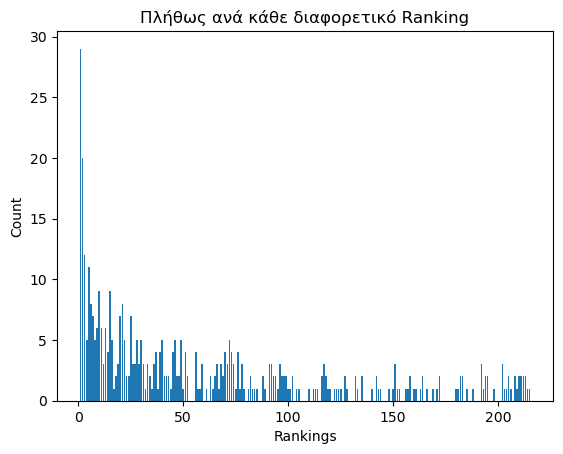

In [4]:
from collections import Counter
import matplotlib.pyplot as plt

# Κρατάω σε έναν πίνακα μόνο τα ranks
ranks = [rank[2] for rank in rankings]

# Μετράω πόσες φορές βρίσκει το συγκεκριμένο rank μέσα στον πίνακα με τα ranks
counts_rank = dict(Counter(ranks))
print(dict(sorted(counts_rank.items())))

# Φτιάχνω μία γραφική παράσταση
plt.bar(counts_rank.keys(), counts_rank.values())
plt.xlabel('Rankings')
plt.ylabel('Count')
plt.title('Πλήθως ανά κάθε διαφορετικό Ranking')
plt.show()

<span style="font-size: 18px;">**Παρατηρήσεις**</span></br>
Βλέπουμε το ενθαριντικό αποτέλεσμα ότι στα αρχικά rankings έχουμε αρκετά καλό πλήθος από καλές προβλέψεις
και έπειτα μειώνονται/σταθεροποιούνται, αλλά δεν μπορούμε να παραλλήψουμε ότι εκτίνονται μέχρι και αρκετά μεγάλα rankings.
---
**Άρα, λαμβάνοντας όλα αυτά υπόψιν μας, μπορούμε να πούμε ότι ο αλγόριθμος δεν λειτουργεί τέλεια, αλλά φαίνεται ότι έχει πολλές περιπτώσεις που λειτουρεί εξαιρετικά.**